In [1]:
from types import SimpleNamespace

# 假设config是你的配置字典
config = {
    'args': {
        'skip_connection': True, 
        'num_classes': 5, 
        'device': 'cuda', 
        'in_dim': 4096, 
        'out_dim': 4096, 
        'in_channels': 1, 
        'scale': 1
    }
}

args = SimpleNamespace(**config['args'])

# 现在你可以使用点符号来访问args的值
print(args.in_dim)  # 输出：4096

4096


In [1]:
import torch

print(torch.version.cuda)
print(torch.cuda.is_available())

12.1
True


# 绘图测试

## 网络结构

In [1]:
import torch 
import torch.nn as nn
from einops import rearrange
from model.TSPN import Transparent_Signal_Processing_Network


In [2]:
from config import args
from config import signal_processing_modules,feature_extractor_modules

import networkx as nx
import matplotlib.pyplot as plt
import torch

net = Transparent_Signal_Processing_Network(signal_processing_modules,feature_extractor_modules, args).cuda()
x = torch.randn(2, 4096, 2).cuda()
y = net(x)
print(y.shape)

import scienceplots
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 16}
# plt.style.use(['science','ieee'])
plt.style.use(['science','ieee','no-latex'])

# build signal processing layers
# build feature extractor layers
# build classifier


/home/user/anaconda3/envs/LQ1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([2, 5])


## 绘图部分

## 1.SP

#### v1

In [10]:
# def draw_signal_processing_layer(G,layer, layer_idx,input_nodes): # 
#     # 
    
#     # 获取weight_connection的权重
#     weight = layer.weight_connection.weight.detach().cpu().numpy() # 获取权重
#     module_num = layer.module_num # 信号处理模块的数量
    
#     in_channel = weight.shape[1] # 输入通道
#     out_channel = weight.shape[0] # 输出通道
    
#     num_per_module = out_channel // module_num # 每个模块的输入通道数量


    
#     output_nodes = [f'$x^{layer_idx + 1}_{j}$' for j in range(out_channel)]

#     G.add_nodes_from(output_nodes, layer='output') # 不需要隐藏掉了
    

#     module_nodes = []
#     for idx, module in enumerate(layer.signal_processing_modules.values(), 1):
#         for i in range(num_per_module):
#             module_name = f'{module.name}_{idx}'
#             module_nodes.append(module_name)
#     G.add_nodes_from(module_nodes, layer='module')
#     # 添加边
#     for i, input_node in enumerate(input_nodes):
#         for j, module_node in enumerate(module_nodes):
#             # 根据权重调整边的属性   
#             G.add_edge(input_node, module_node,weight=weight[j, i])
#             G.add_edge(module_node, output_nodes[j])
    
    
#     # 如果存在skip_connection，则添加跳跃连接
#     if hasattr(layer, 'skip_connection'):
#         skip_weight = layer.skip_connection.weight.detach().cpu().numpy()
        
#         # output_nodes = [f'$O_{j}$' for j in range(out_channel)] # 输出节点 
#         for i, input_node in enumerate(input_nodes):
#             for j, output_node in enumerate(output_nodes):
#                 G.add_edge(input_node, output_node, weight = skip_weight[j, i], skip=True)
#     return G, output_nodes

# def draw_signal_processing_layers(model, input):
#     G = nx.Graph()
#     input_nodes = [f'$x^0_{j}$' for j in range(input.shape[2])]
#     for idx, layer in enumerate(model.signal_processing_layers):
#         G, input_nodes = draw_signal_processing_layer(G,layer, idx, input_nodes)    
    
#     # 使用networkx绘制图形
#     pos = nx.spring_layout(G)  # 可以根据需要选择不同的布局
#     weights = [G[u][v]['weight'] for u, v in G.edges()]
#     nx.draw(G, pos, with_labels=True, edges=G.edges(), width=weights)
#     plt.title(f'Signal Processing Layers')
#     plt.savefig('save/Signal_Processing_Layers.png')
#     plt.show()
#     return G, input_nodes



#### v2

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def assign_positions_based_on_names(G):
    pos = {}
    layer_node_counts = {}  # 用于存储每层的节点数，以便于计算垂直位置

    for node in G.nodes:
        # 去掉特殊字符，然后根据'^'和'_'分割
        parts = node.strip('$').split('^')
        if len(parts) < 2:
            continue  # 如果格式不符合预期，则跳过该节点
        layer_part = parts[1]
        
        layer_idx, node_idx = layer_part.split('_')
        layer_idx = int(layer_idx)
        node_idx = int(node_idx)

        # 更新每层的节点数
        if layer_idx not in layer_node_counts:
            layer_node_counts[layer_idx] = 1
        else:
            layer_node_counts[layer_idx] += 1

        # 计算节点位置
        # X坐标由层级决定，Y坐标由该层中的节点顺序决定
        pos[node] = (layer_idx, -node_idx)

    # 为了让图中的节点布局更加均衡，我们可以根据每层节点数的最大值调整节点的Y坐标
    max_nodes_per_layer = max(layer_node_counts.values())
    for node, (layer_idx, node_idx) in pos.items():
        adjusted_node_idx = node_idx + max_nodes_per_layer / 2 - layer_node_counts[layer_idx] / 2
        pos[node] = (layer_idx, adjusted_node_idx)

    return pos






def draw_signal_processing_layer(G, layer, layer_idx, input_nodes):
    weight = layer.weight_connection.weight.detach().cpu().numpy()
    module_num = layer.module_num
    
    in_channel = weight.shape[1]
    out_channel = weight.shape[0]
    num_per_module = out_channel // module_num
    output_nodes = [f'$x^{layer_idx + 1}_{j}$' for j in range(out_channel)]

    G.add_nodes_from(output_nodes, layer='output')
    
    module_nodes = []
    for idx, module in enumerate(layer.signal_processing_modules.values(), 1):
        module_name = f'${module.name}^{layer_idx + 1}_{idx}$'  # f'$\phi^{layer_idx + 1}_{idx}$' #  f'{module.name}^{layer_idx + 1}_{idx}' 
        module_nodes.extend([module_name for _ in range(num_per_module)])
    G.add_nodes_from(module_nodes, layer='module')

    # 添加边，避免使用flatten
    for i, input_node in enumerate(input_nodes):
        for j, module_node in enumerate(module_nodes):
            # 直接使用权重矩阵中的值
            G.add_edge(input_node, module_node, weight=weight[j % num_per_module, i], style='solid')
    
    # 添加从模块到输出的虚线边
    for j, module_node in enumerate(module_nodes):
        G.add_edge(module_node, output_nodes[j % len(output_nodes)], style='dashed', arrows=False)
    
    if hasattr(layer, 'skip_connection'):
        skip_weight = layer.skip_connection.weight.detach().cpu().numpy()
        for i, input_node in enumerate(input_nodes):
            for j, output_node in enumerate(output_nodes):
                G.add_edge(input_node, output_node, weight=skip_weight[j, i], style='dashed')
    return G, output_nodes

def draw_signal_processing_layers(model, input):
    G = nx.DiGraph()  # 使用有向图更好地表示信息流
    input_nodes = [f'$x^{0}_{j}$' for j in range(input.shape[2])]
    for idx, layer in enumerate(model.signal_processing_layers):
        G, input_nodes = draw_signal_processing_layer(G, layer, idx, input_nodes)    
    # 使用自动分配位置的函数替换原有的pos计算
    
    # pos = nx.spring_layout(G)
    
    pos = assign_positions_based_on_names(G)
    
    edges = G.edges(data=True)
    solid_edges = [(u, v) for u, v, d in edges if d.get('style', None) == 'solid']
    dashed_edges = [(u, v) for u, v, d in edges if d.get('style', None) == 'dashed']
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    
    # 绘制实线边
    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color='black',width=1.0, node_size=100)
    
    # 绘制虚线边，可能需要根据您的matplotlib版本和后端调整实现方式
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, edge_color='blue', style='dashed',width=1.0, node_size=100, arrows=False)

    plt.title('Signal Processing Layers Visualization')
    plt.axis('off')  # 隐藏坐标轴
    plt.savefig('Signal_Processing_Layers_Visualization_Updated.png', format='PNG')
    plt.show()
    return G, input_nodes


### V3 环形分布

解析

In [3]:
def parse_node_name(node):
    """
    解析节点名称，提取节点类型、层级和索引。

    参数:
    - node: 字符串类型，形如 'x^0_1' 的节点名称。

    返回:
    - tuple: 包含节点类型、层级和索引的元组。
    """
    # 去掉美元符号（如果存在）
    node = node.replace('$', '')
    
    # 根据 '^' 分割，分离节点类型和后续部分
    parts = node.split('^')
    if len(parts) != 2:
        raise ValueError("Node name does not conform to expected format 'type^layer_index'.")

    # 分离出类型和后续部分，后续部分应当能够根据 '_' 分割出层级和索引
    node_type, layer_index_part = parts[0], parts[1]
    if '_' not in layer_index_part:
        raise ValueError("Layer and index part does not contain '_'.")

    # 分离出层级和索引
    layer, index = layer_index_part.split('_')
    layer = int(layer)
    index = int(index)
    if node_type not in ['x', 's', 'f','y']:
        node_type = 'module'
    return node_type, layer, index

# node_name = 'x^1_3'
# node_type, layer, index = parse_node_name(node_name)
# print(f"Node Type: {node_type}, Layer: {layer}, Index: {index}")


Node Type: x, Layer: 1, Index: 3


计算未知

In [28]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def assign_circular_positions_based_on_names(G, radius_step=1.0):
    pos = {}
    layer_node_counts = {}  # 用于x层级节点
    module_node_counts = {}  # 用于module层级节点

    # 首先获取每个层级的x节点和module节点数目
    for node in G.nodes:
        node_type, layer_idx, _ = parse_node_name(node)
        if 'module' in node_type:
            module_node_counts[layer_idx] = module_node_counts.get(layer_idx, 0) + 1
        else:
            layer_node_counts[layer_idx] = layer_node_counts.get(layer_idx, 0) + 1

    # 计算每个节点的位置
    for node in G.nodes:
        node_type, layer_idx, node_idx = parse_node_name(node)

        # 根据层级计算半径，层级越高半径越大
        radius = (layer_idx + 1) * radius_step
        
        # 如果节点是module类型，则半径减少
        if 'module' in node_type:
            radius -= radius_step / 2  # module在内侧
            angle_step = 2 * math.pi / module_node_counts[layer_idx]  # module节点之间的角度步长
            # 偏移角度使得module节点位于两个x节点之间
            angle_offset = angle_step / 2
        else:
            angle_step = 2 * math.pi / layer_node_counts[layer_idx]  # x节点之间的角度步长
            angle_offset = 0

        # 计算角度
        angle = node_idx * angle_step + angle_offset

        # 计算节点位置
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)

        pos[node] = (x, y)

    return pos




# 在draw_signal_processing_layers函数内部使用assign_circular_positions_based_on_names函数
# pos = assign_circular_positions_based_on_names(G)
# 创建测试网络图
# G = nx.DiGraph()

# # 添加节点，包括 'x', 'HT', 和 'y' 类型的节点
# G.add_node('x^0_0')
# G.add_node('x^0_1')
# G.add_node('x^1_0')
# G.add_node('x^1_0')
# G.add_node('HT^1_1')
# G.add_node('HT^1_2')
# G.add_node('y^2_0')
# G.add_node('y^2_1')

# # 添加一些边以形成网络结构
# G.add_edge('x^0_0', 'HT^1_1')
# G.add_edge('x^0_1', 'HT^1_1')
# G.add_edge('HT^1_1', 'y^2_0')
# G.add_edge('x^0_0', 'HT^1_2')
# G.add_edge('x^0_1', 'HT^1_2')
# G.add_edge('HT^1_2', 'y^2_1')
# G.add_edge('x^1_0', 'y^2_0')
# G.add_edge('x^1_0', 'y^2_1')

# # 应用位置分配函数
# pos = assign_circular_positions_based_on_names(G)

# # 绘制网络图
# plt.figure(figsize=(8, 8))
# nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_weight='bold')
# plt.title('Circular Layered Network Visualization')
# plt.show()


绘制

In [51]:
def draw_signal_processing_layer(G, layer, layer_idx, input_nodes):
    weight = layer.weight_connection.weight.detach().cpu().numpy()
    module_num = layer.module_num
    
    in_channel = weight.shape[1]
    out_channel = weight.shape[0]
    num_per_module = out_channel // module_num
    output_nodes = [f'$x^{layer_idx + 1}_{j}$' for j in range(out_channel)]

    G.add_nodes_from(output_nodes, layer='output')
    
    module_nodes = []
    for idx, module in enumerate(layer.signal_processing_modules.values(), 1):
        # module_name = f'${module.name}^{layer_idx + 1}_{idx}$'  # f'$\phi^{layer_idx + 1}_{idx}$' #  f'{module.name}^{layer_idx + 1}_{idx}' 
        module_nodes.extend([f'${module.name}^{layer_idx + 1}_{int(idx * num_per_module) + j}$' for j in range(num_per_module)])
    G.add_nodes_from(module_nodes, layer='module')

    # 添加边，避免使用flatten
    for i, input_node in enumerate(input_nodes):
        for j, module_node in enumerate(module_nodes):
            # 直接使用权重矩阵中的值
            G.add_edge(input_node, module_node, weight=weight[j % num_per_module, i], style='solid')
    
    # 添加从模块到输出的虚线边
    for j, module_node in enumerate(module_nodes):
        G.add_edge(module_node, output_nodes[j % len(output_nodes)], style='dashed', arrows=False)
    
    if hasattr(layer, 'skip_connection'):
        skip_weight = layer.skip_connection.weight.detach().cpu().numpy()
        for i, input_node in enumerate(input_nodes):
            for j, output_node in enumerate(output_nodes):
                G.add_edge(input_node, output_node, weight=skip_weight[j, i], style='dashed')
    return G, output_nodes

def draw_signal_processing_layers(model, input):
    G = nx.DiGraph()  # 使用有向图更好地表示信息流
    input_nodes = [f'$x^{0}_{j}$' for j in range(input.shape[2])]
    for idx, layer in enumerate(model.signal_processing_layers):
        G, input_nodes = draw_signal_processing_layer(G, layer, idx, input_nodes)    
    # 使用自动分配位置的函数替换原有的pos计算
    
    # pos = nx.spring_layout(G)
    
    # pos = assign_positions_based_on_names(G)
    pos = assign_circular_positions_based_on_names(G, radius_step=3.0)
    
    edges = G.edges(data=True)
    solid_edges = [(u, v) for u, v, d in edges if d.get('style', None) == 'solid']
    dashed_edges = [(u, v) for u, v, d in edges if d.get('style', None) == 'dashed']
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=5, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=5)
    
    # 绘制实线边
    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color='black',width=0.5, node_size=5,alpha=0.1)
    
    # 绘制虚线边，可能需要根据您的matplotlib版本和后端调整实现方式
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, edge_color='blue', style='dashed',width=0.5, node_size=5, arrows=False, alpha=0.1)

    plt.title('Signal Processing Layers Visualization')
    plt.axis('off')  # 隐藏坐标轴
    plt.savefig('Signal_Processing_Layers_Visualization_Updated.png', format='PNG')
    plt.show()
    return G, input_nodes

###  V4

In [3]:
def parse_node_name(node):
    """
    解析节点名称，提取节点类型、层级和索引。

    参数:
    - node: 字符串类型，形如 'x^0_1' 的节点名称。

    返回:
    - tuple: 包含节点类型、层级和索引的元组。
    """
    # 去掉美元符号（如果存在）
    node = node.replace('$', '')
    
    # 根据 '^' 分割，分离节点类型和后续部分
    parts = node.split('^')
    if len(parts) != 2:
        raise ValueError("Node name does not conform to expected format 'type^layer_index'.")

    # 分离出类型和后续部分，后续部分应当能够根据 '_' 分割出层级和索引
    node_type, layer_index_part = parts[0], parts[1]
    if '_' not in layer_index_part:
        raise ValueError("Layer and index part does not contain '_'.")

    # 分离出层级和索引
    layer, index = layer_index_part.split('_')
    layer = int(layer)
    index = int(index)
    if node_type not in ['x', 's', 'f','y']:
        node_type = 'module'
    return node_type, layer, index

In [4]:
def assign_vertical_positions_based_on_names(G, vertical_step=1.0, horizontal_spread=1.0, module_offset_x=0.2, module_offset_y=0.2):
    pos = {}
    layer_node_counts = {}  # 记录每层的节点数量
    module_node_counts = {}  # 用于module层级节点

    # 首先获取每个层级的x节点和module节点数目
    for node in G.nodes:
        node_type, layer_idx, _ = parse_node_name(node)
        if 'module' in node_type:
            module_node_counts[layer_idx] = module_node_counts.get(layer_idx, 0) + 1
        else:
            if layer_idx not in layer_node_counts:
                layer_node_counts[layer_idx] = {'x': 0, 'module': 0}
            layer_node_counts[layer_idx]['x'] += 1
    max_layer_idx = max(layer_node_counts.keys())  # 确定最大层级索引

    # 对每个节点计算其位置
    for node in G.nodes:
        node_type, layer_idx, node_idx = parse_node_name(node)
        y = (max_layer_idx - layer_idx) * vertical_step  # 纵向位置

        if 'module' in node_type:
            # module节点计算方法
            count = module_node_counts.get(layer_idx, 0)
            x_offset = module_offset_x  # 右偏移
            y_offset = module_offset_y  # 上偏移
        else:
            # x节点和其他类型节点计算方法
            count = layer_node_counts[layer_idx]['x']
            x_offset = 0
            y_offset = 0

        # 水平位置
        x = (node_idx - (count - 1) / 2) * horizontal_spread + x_offset
        y += y_offset  # 应用偏移

        pos[node] = (x, y)

    return pos


In [5]:

def draw_signal_processing_layer(G, layer, layer_idx, input_nodes):
    weight = layer.weight_connection.weight.detach().cpu().numpy() 
    # weight norm
    weight = (weight - weight.min(axis = 0)) / (weight.max(axis = 0) - weight.min(axis = 0) + 1e-8)
    module_num = layer.module_num
    
    in_channel = weight.shape[1]
    out_channel = weight.shape[0]
    num_per_module = out_channel // module_num
    output_nodes = [f'$x^{layer_idx + 1}_{j}$' for j in range(out_channel)]

    G.add_nodes_from(output_nodes, layer='output')
    
    module_nodes = []
    for idx, module in enumerate(layer.signal_processing_modules.values(), 0):
        # module_name = f'${module.name}^{layer_idx + 1}_{idx}$'  # f'$\phi^{layer_idx + 1}_{idx}$' #  f'{module.name}^{layer_idx + 1}_{idx}' 
        module_nodes.extend([f'${module.name}^{layer_idx + 1}_{int(idx * num_per_module) + j}$' for j in range(num_per_module)])
    G.add_nodes_from(module_nodes, layer='module')

    # 添加边，避免使用flatten ################   input》module   ###################
    for i, input_node in enumerate(input_nodes):
        for j, module_node in enumerate(module_nodes):
            edge_weight = weight[j % num_per_module, i]
            edge_color = 'green' if edge_weight >= 0 else 'red'
            alpha = abs(edge_weight)  # 透明度
            # 直接使用权重矩阵中的值
            G.add_edge(input_node, module_node, weight=edge_weight, style='solid',color=edge_color,alpha = alpha)
    
    # 添加从模块到输出的虚线边
    for j, module_node in enumerate(module_nodes):
        G.add_edge(module_node, output_nodes[j % len(output_nodes)], weight = 1, style='solid', color = 'black', arrows=False, alpha = 1)
    
    
    if hasattr(layer, 'skip_connection'):
        skip_weight = layer.skip_connection.weight.detach().cpu().numpy()
        skip_weight = (skip_weight - skip_weight.min(axis = 0)) / (skip_weight.max(axis = 0) - skip_weight.min(axis = 0) + 1e-8)   
        for i, input_node in enumerate(input_nodes):
            for j, output_node in enumerate(output_nodes):
                edge_weight = weight[j % num_per_module, i]
                edge_color = 'green' if edge_weight >= 0 else 'red'
                alpha = abs(edge_weight)  # 透明度
                G.add_edge(input_node, output_node, weight=edge_weight, style='dashed',color=edge_color,alpha = alpha)
    return G, output_nodes

def draw_signal_processing_layers(model, input):
    G = nx.DiGraph()  # 使用有向图更好地表示信息流
    input_nodes = [f'$x^{0}_{j}$' for j in range(input.shape[2])]
    for idx, layer in enumerate(model.signal_processing_layers):
        G, input_nodes = draw_signal_processing_layer(G, layer, idx, input_nodes)
    return G, input_nodes
        
def draw_G(G):    
    # 使用自动分配位置的函数替换原有的pos计算
    
    # pos = nx.spring_layout(G)
    
    # pos = assign_positions_based_on_names(G)
    pos = assign_vertical_positions_based_on_names(G)
    
    # edges = G.edges(data=True)
    # solid_edges = [(u, v) for u, v, d in edges if d.get('style', None) == 'solid']
    # dashed_edges = [(u, v) for u, v, d in edges if d.get('style', None) == 'dashed']
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=5)
    # 绘制实线边


    # 绘制虚线边
    for u, v, d in G.edges(data=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=d['color'], style=d['style'], width=0.5, node_size=5, arrows=False, alpha=d['alpha'])
            
    # nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color='black',width=0.5, node_size=5,alpha=0.1)
    
    # # 绘制虚线边，可能需要根据您的matplotlib版本和后端调整实现方式
    # nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, edge_color='blue', style='dashed',width=0.5, node_size=5, arrows=False, alpha=0.1)

    plt.title('Signal Processing Layers Visualization')
    plt.axis('off')  # 隐藏坐标轴
    plt.savefig('Signal_Processing_Layers_Visualization_Updated.png', format='PNG')
    plt.show()
    return G # , input_nodes

### 测试

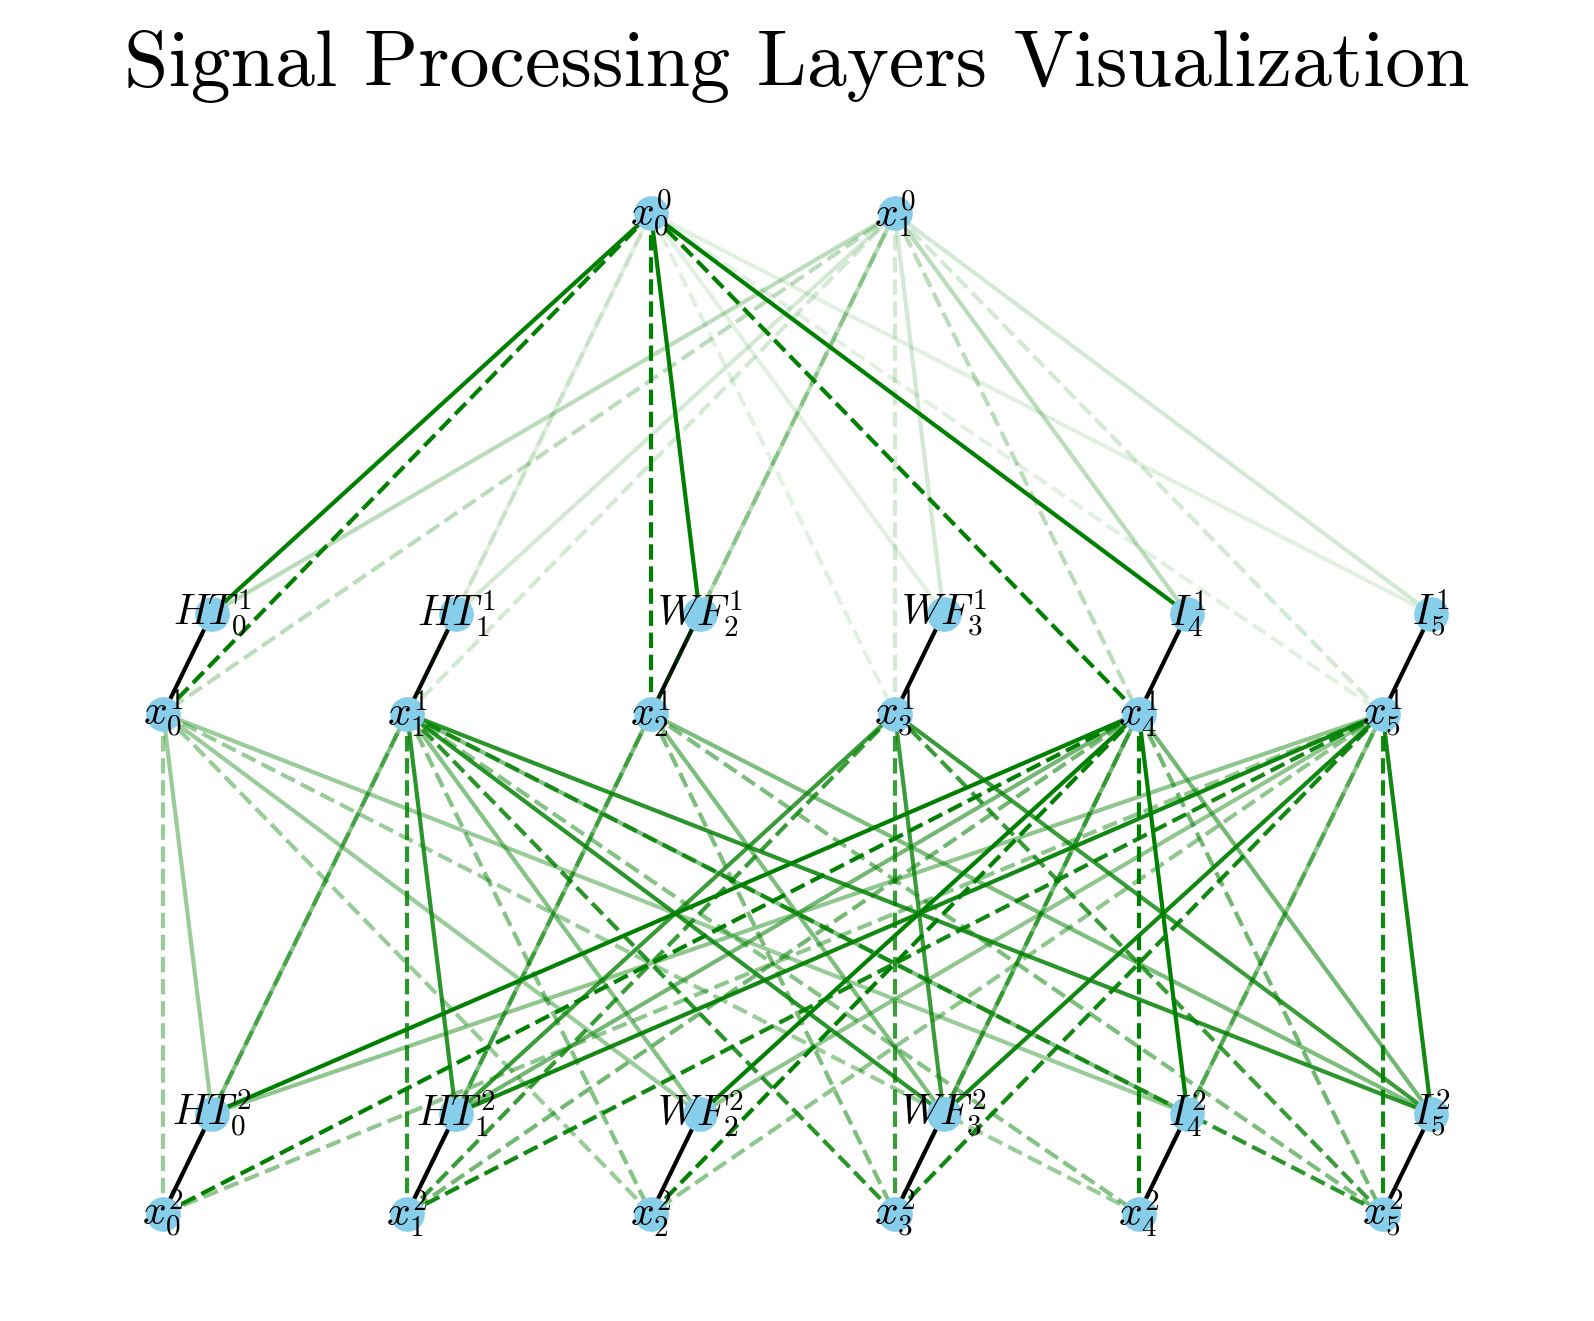

In [6]:
G,input_nodes = draw_signal_processing_layers(net, x)
draw_G(G)

## 裁剪节点和边
1. 如果weight小于阈值，删除节点和边。
2. 如果节点没有入度，删除节点和节点之后的边。

In [61]:
import networkx as nx

# 假设G是已经创建的NetworkX图
G_copy = G.copy()

# 遍历原始图G的边
for u, v, d in G.edges(data=True):
    if abs(d['weight']) < 0.8:
        # 如果G_copy中存在边(u, v)，则删除这条边
        if G_copy.has_edge(u, v):
            G_copy.remove_edge(u, v)

# # 遍历所有节点，检查每个节点是否还有父节点
# for node in list(G_copy.nodes):
#     # 如果这个节点没有父节点，删除这个节点
#     if G_copy.in_degree(node) == 0:
#         G_copy.remove_node(node)


# 用副本替换原图
G_copy

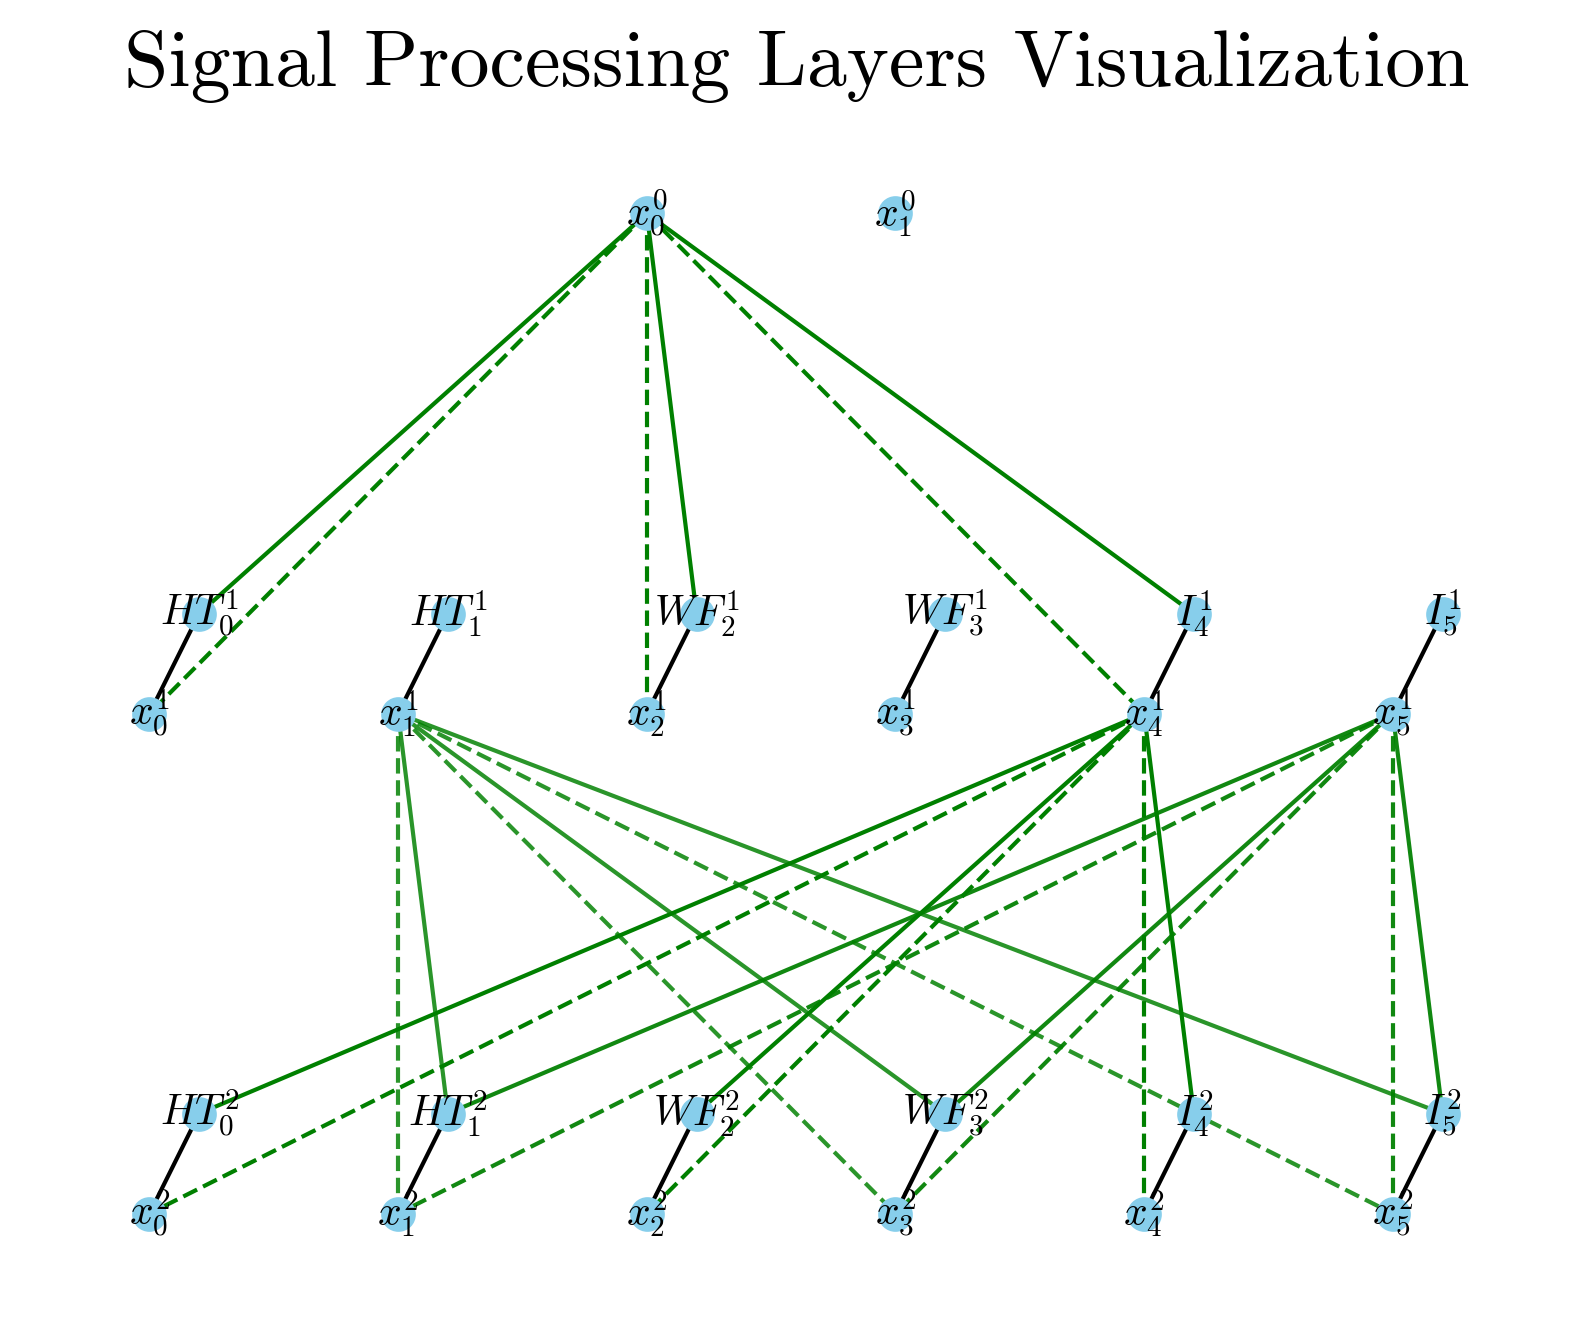

In [62]:
draw_G(G_copy)

## TODO 裁剪后重排

## 2.feature

V1

In [17]:


def draw_feature_layers(model,input_nodes):
    G_F = nx.DiGraph()
    
    weight = model.weight_connection.weight.detach().cpu().numpy()
    weight = (weight - weight.min(axis = 0)) / (weight.max(axis = 0) - weight.min(axis = 0) + 1e-8)
    in_channel = weight.shape[1]
    out_channel = weight.shape[0]
    
    feautre_nodes = [f'$f^{j}{idx}$' for j in range(out_channel) for idx in range(len(model.feature_extractor_modules))] # 重复了
    # tau_nodes = [f'$\tau^{j}_{idx}$' for j in range(out_channel) for idx in range(len(model.feature_extractor_modules))]
    # G_F.add_nodes_from(feautre_nodes, layer='feature')
    # G_F.add_nodes_from(tau_nodes, layer='tau')
    G_F.add_nodes_from(input_nodes, layer='input')
    
    for j in range(out_channel):
        signal_node = f'$s_{j}$'
        G_F.add_node(signal_node, layer='signal')
        for i in range(in_channel):
            edge_weight = weight[j, i]
            edge_color = 'green' if edge_weight >= 0 else 'red'
            alpha = abs(edge_weight)  # 透明度           
            G_F.add_edge(input_nodes[i], signal_node, weight=edge_weight, style='solid',color=edge_color,alpha = alpha)
                
        for idx, module in enumerate(model.feature_extractor_modules.values(), 1):
            
            tau_node = f'$\\tau^{j}_{{{idx}}}$'
            feature_node = f'$f^{j}_{{{idx}}}$'
            G_F.add_node(tau_node, layer='tau')
            G_F.add_node(feature_node, layer='feature')
                        
            G_F.add_edge(signal_node, tau_node, weight=1, style='solid',color = 'black',alpha = 0.3)
            G_F.add_edge(tau_node, feature_node, weight=1, style='solid',color = 'black',alpha = 0.3)
    # for j in range(out_channel):
    #     for idx, module in enumerate(model.feature_extractor_modules.values(), 1):    
        
    return G_F, feautre_nodes

def draw_feature_G(G):
    pos = assign_positions_central_aligned(G)
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=4)



    # 绘制虚线边
    for u, v, d in G.edges(data=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=d['color'], style=d['style'], width=0.5, node_size=5, arrows=False, alpha=d['alpha'])
            

    plt.title('Feature Extractor Layers Visualization')
    plt.axis('off')  # 隐藏坐标轴
    plt.savefig('Feature_Extractor_Layers_Visualization_Updated.png', format='PNG')
    plt.show()
    return G # , input_nodes
    

### pos

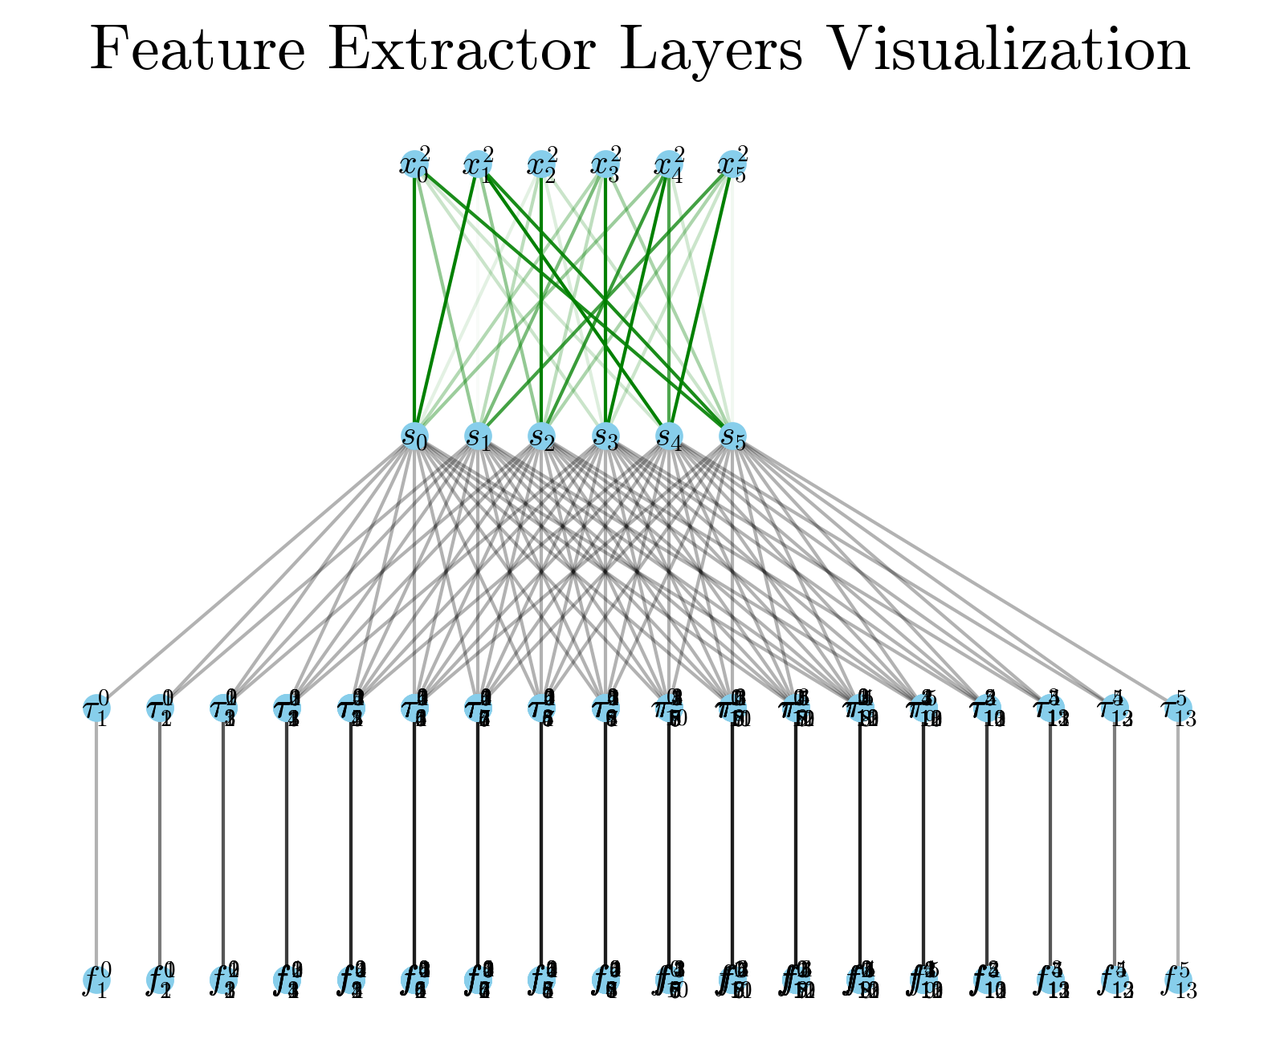

In [11]:
def assign_positions_central_aligned(G, vertical_step=1.0, horizontal_spread=1.0):
    pos = {}
    layer_heights = {
        'input': 0,
        'signal': -vertical_step,
        'tau': -2 * vertical_step,
        'feature': -3 * vertical_step
    }

    # 初始化每层的节点计数
    layer_node_counts = {'input': [], 'signal': [], 'tau': [], 'feature': []}

    # 统计每个节点的j值，用于后续计算横向位置
    for node in G.nodes:
        node_type, j, _ = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)
        layer_node_counts[layer].append(j)

    # 计算每层最大j值对应的节点数量，以便中心对称
    layer_max_j = {layer: max(j_list) if j_list else 0 for layer, j_list in layer_node_counts.items()}
    layer_max_counts = {layer: layer_node_counts[layer].count(max_j) for layer, max_j in layer_max_j.items()}

    # 对每个节点分配位置
    for node in G.nodes:
        node_type, j, idx = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)

        # 横向位置：基于j值计算x位置，使得每个j值的节点在层内居中
        x_center_offset = (layer_max_counts[layer] - 1) / 2.0
        x_offset = layer_node_counts[layer].count(j)  # 当前j值的节点数量
        x = (j - layer_max_j[layer] / 2) * horizontal_spread + (idx - x_offset / 2) * horizontal_spread
        y = layer_heights[layer]
        
        pos[node] = (x, y)
        
    return pos



def get_layer_from_node_type(node):
    """根据节点名称确定层"""
    if 'x^' in node:
        return 'input'
    elif 's_' in node:
        return 'signal'
    elif '$\\tau^' in node:
        return 'tau'
    elif '$f^' in node:
        return 'feature'
    return ''


def parse_node_name_feature(node_name):
    node_name = node_name.replace('$', '')
    node_name = node_name.replace('{', '')
    node_name = node_name.replace('}', '')
    if 'x^' in node_name:
        j = int(node_name.split('_')[1])
        return 'input', j, 0
    elif 's_' in node_name:
        j = int(node_name.split('_')[1])
        return 'signal', j, 0
    elif '\\tau^' in node_name or 'f^' in node_name:
        parts = node_name.split('_')
        j = int(parts[0].split('^')[1])
        idx = int(parts[1].rstrip('$'))
        return ('tau' if '$\\tau^' in node_name else 'feature'), j, idx
    return '', 0, 0


分层

但是会重叠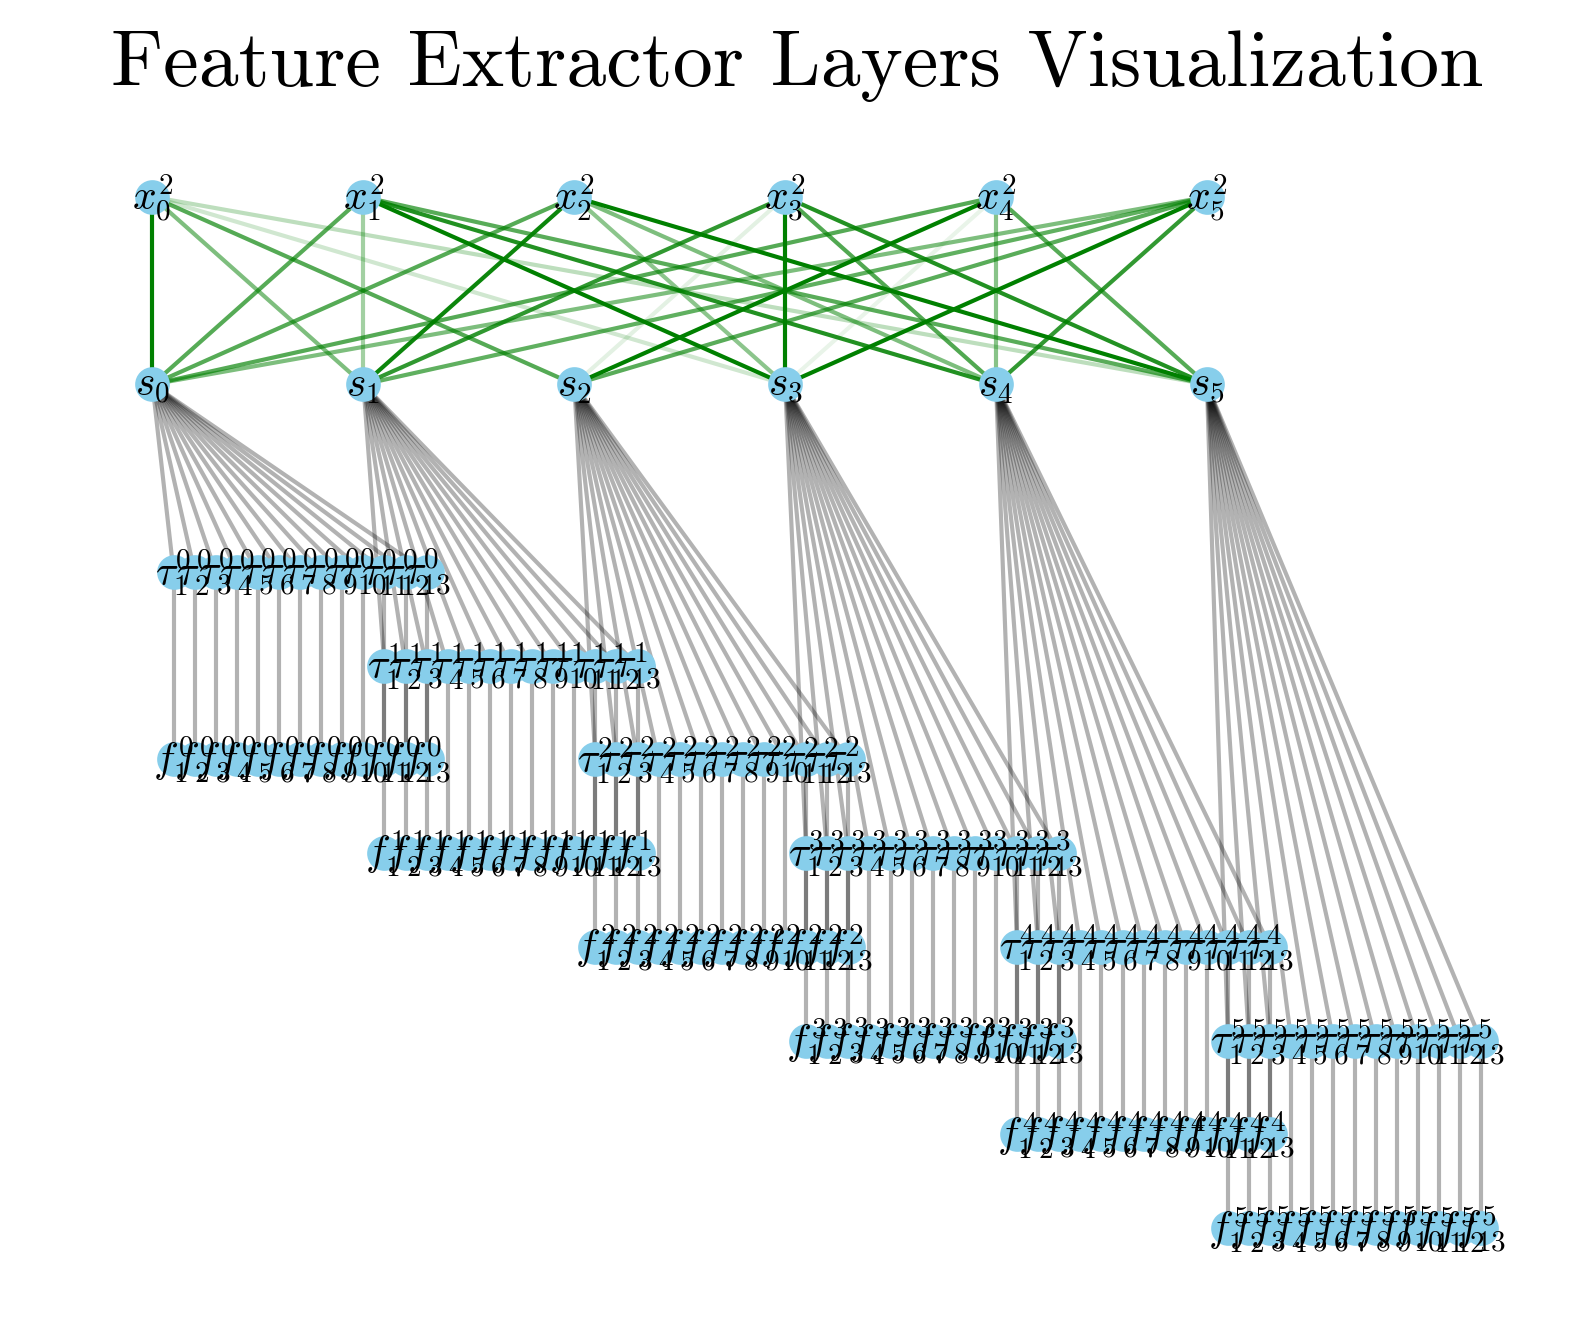

In [ ]:

def assign_positions_central_aligned(G, vertical_step=1.0, horizontal_spread=1.0, y_shift=0.05):
    pos = {}
    layer_heights = {
        'input': 0,
        'signal': -vertical_step,
        'tau': -2 * vertical_step,
        'feature': -3 * vertical_step
    }

    # 初始化每层的节点计数
    layer_node_j_values = {'input': [], 'signal': [], 'tau': [], 'feature': []}

    # 统计每个节点的j值，用于后续计算横向位置
    for node in G.nodes:
        _, j, _ = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)
        layer_node_j_values[layer].append(j)

    # 对每个节点分配位置
    for node in G.nodes:
        node_type, j, idx = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)

        # 确定每个j值在该层的索引列表
        j_values = layer_node_j_values[layer]
        unique_j_values = sorted(set(j_values))
        j_index = unique_j_values.index(j)

        # 横向位置：根据j值的唯一索引进行调整
        x = (j_index - len(unique_j_values) / 2 + 0.5) * horizontal_spread + idx * 0.1  # idx用于在同一j值内部进一步区分位置

        # 垂直位置调整：对tau和feature层添加轻微的y偏移，以区分不同的j值
        if layer in ['tau', 'feature']:
            y = layer_heights[layer] - (j % len(unique_j_values)) * y_shift
        else:
            y = layer_heights[layer]

        pos[node] = (x, y)

    return pos

没有居中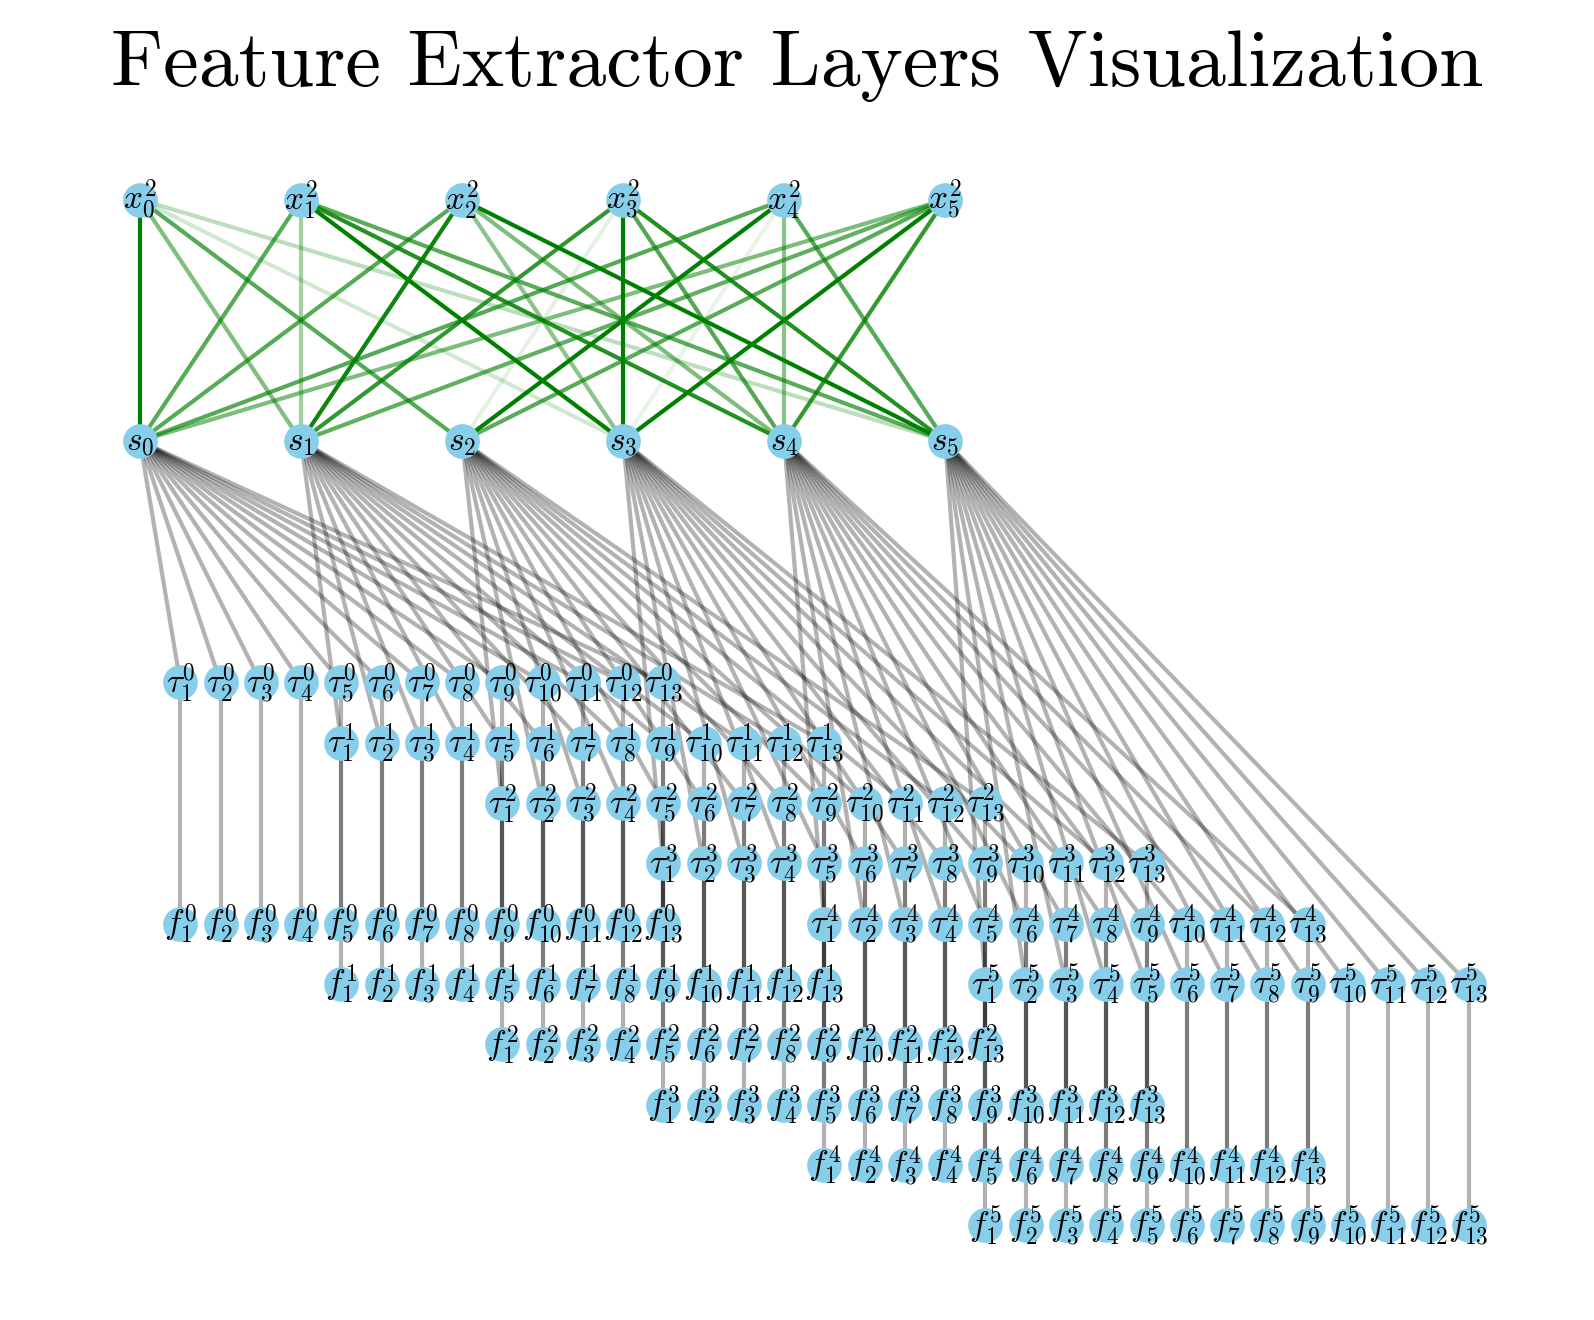

In [53]:
def assign_positions_central_aligned(G, vertical_step=1.0, horizontal_spread=1.0, tau_horizontal_spread=2.0, y_shift=0.25):
    pos = {}
    layer_heights = {
        'input': 0,
        'signal': -vertical_step,
        'tau': -2 * vertical_step,
        'feature': -3 * vertical_step
    }

    # 初始化每层的节点计数
    layer_node_j_values = {'input': [], 'signal': [], 'tau': [], 'feature': []}
    layer_node_idx_values = {'input': [], 'signal': [], 'tau': [], 'feature': []}

    # 统计每个节点的j值，用于后续计算横向位置
    for node in G.nodes:
        _, j, idx = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)
        layer_node_j_values[layer].append(j)
        layer_node_idx_values[layer].append(idx)

    # 对每个节点分配位置
    for node in G.nodes:
        node_type, j, idx = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)

        # 确定每个j值在该层的索引列表
        j_values = layer_node_j_values[layer]
        unique_j_values = sorted(set(j_values))
        j_index = unique_j_values.index(j)

        # 对tau节点使用特殊的横向间距
        spread = tau_horizontal_spread if layer == 'tau' or 'feature' else horizontal_spread

        # 横向位置：根据j值的唯一索引进行调整 
        x = (j_index - len(unique_j_values) / 2 + 0.5) * spread + idx * (0.5  if layer != 'tau' or 'feature' else spread/10 )  

        # x = (j_index - len(unique_j_values) / 2 + 0.5) * horizontal_spread + idx * 0.1  # idx用于在同一j值内部进一步区分位置
        
        # 垂直位置调整：对tau和feature层添加轻微的y偏移，以区分不同的j值
        if layer in ['tau', 'feature']:
            y = layer_heights[layer] - (j % len(unique_j_values)) * y_shift
        else:
            y = layer_heights[layer]

        pos[node] = (x, y)

    return pos


OK 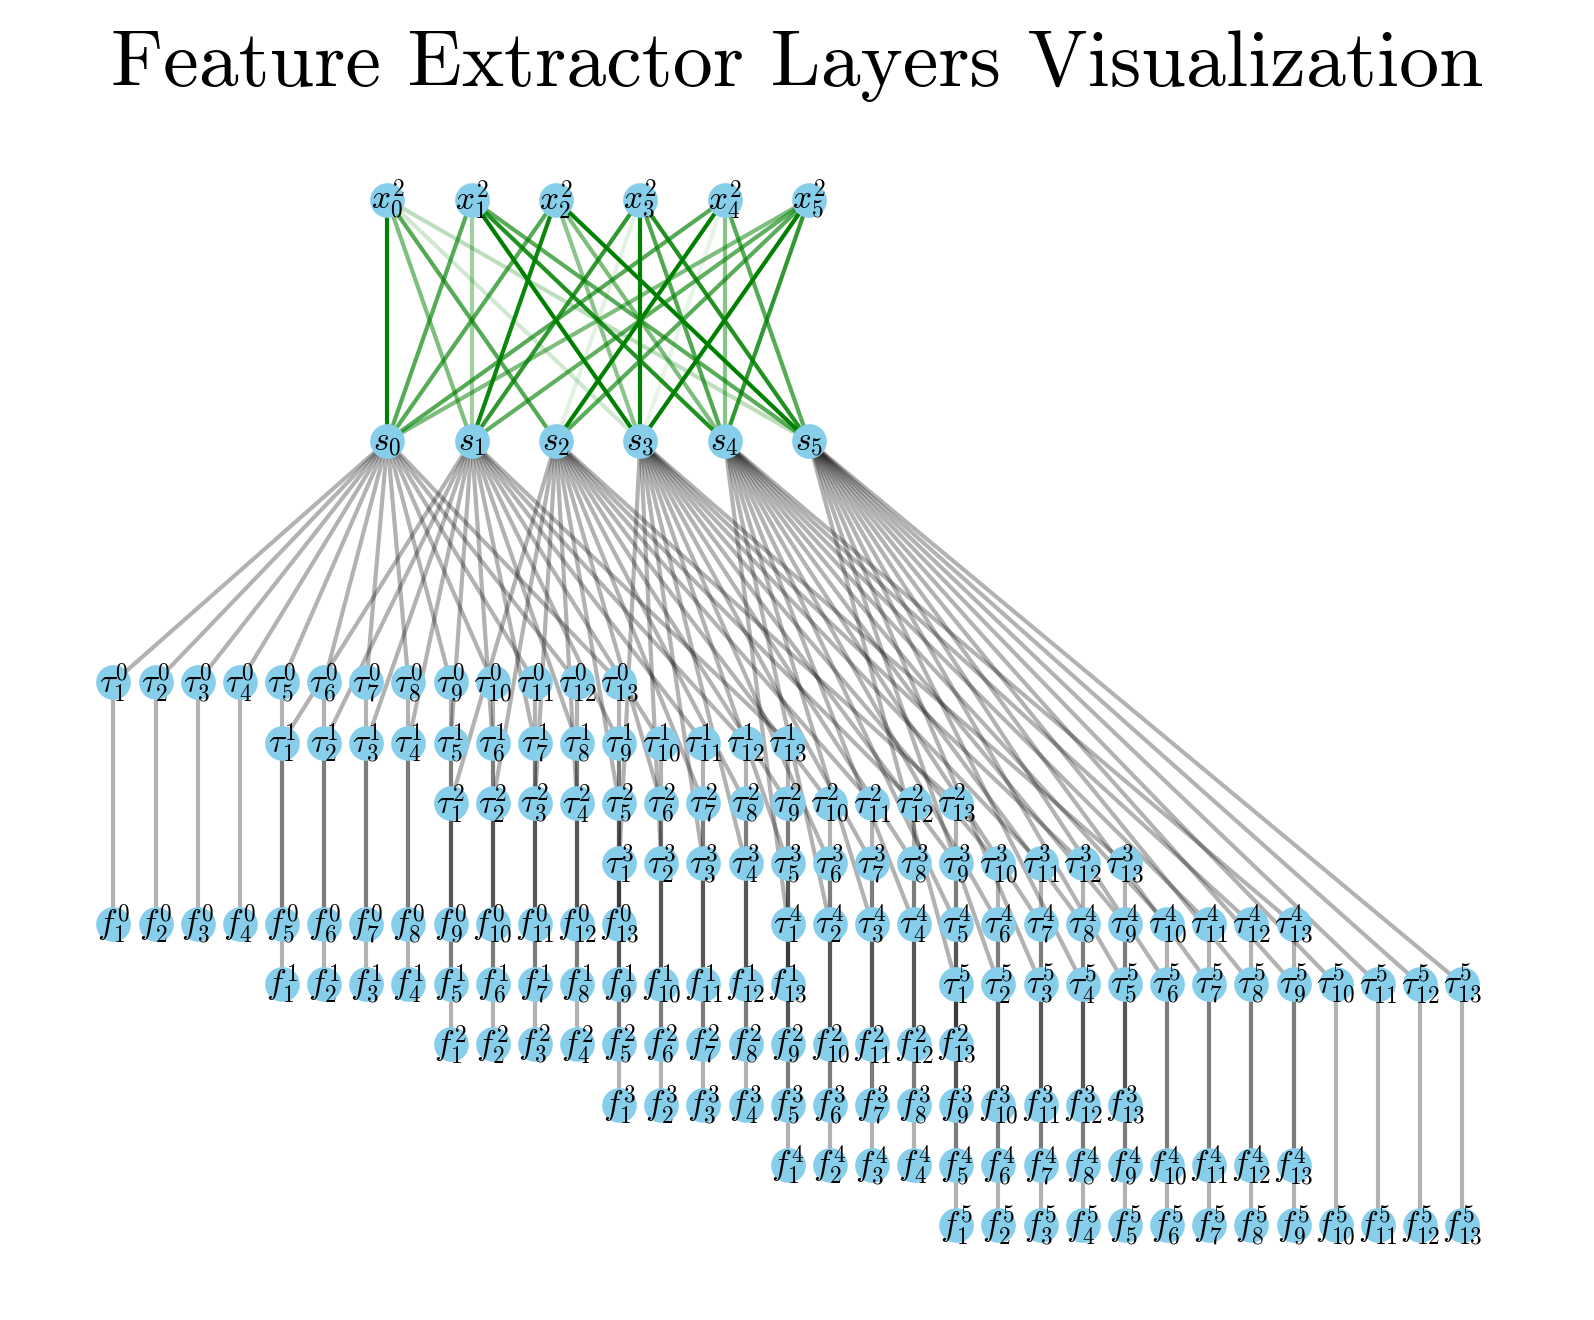

In [57]:
def assign_positions_central_aligned(G, vertical_step=1.0, horizontal_spread=1.0, tau_horizontal_spread=2.0, y_shift=0.25, idx_shift_factor=0.5):
    pos = {}
    layer_heights = {
        'input': 0,
        'signal': -vertical_step,
        'tau': -2 * vertical_step,
        'feature': -3 * vertical_step
    }

    # 初始化每层的节点计数
    layer_node_j_values = {'input': [], 'signal': [], 'tau': [], 'feature': []}
    layer_node_idx_values = {'input': [], 'signal': [], 'tau': [], 'feature': []}

    # 统计每个节点的j值，用于后续计算横向位置
    for node in G.nodes:
        _, j, idx = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)
        layer_node_j_values[layer].append(j)
        layer_node_idx_values[layer].append(idx)

    # 对每个节点分配位置
    for node in G.nodes:
        node_type, j, idx = parse_node_name_feature(node)
        layer = get_layer_from_node_type(node)

        # 确定每个j值在该层的索引列表
        j_values = layer_node_j_values[layer]
        unique_j_values = sorted(set(j_values))
        j_index = unique_j_values.index(j)

        # 对tau节点和feature节点使用特殊的横向间距
        spread = tau_horizontal_spread if layer in ['tau', 'feature'] else horizontal_spread

        # 横向位置：根据j值的唯一索引进行调整，并根据idx进行细微调整
        x = (j_index - len(unique_j_values) / 2 + 0.5) * spread
        if layer in ['tau', 'feature']:
            x += (idx - (layer_node_idx_values[layer].count(idx) - 1) / 2.0) * idx_shift_factor
        
        # 垂直位置调整：对tau和feature层添加轻微的y偏移，以区分不同的j值
        y = layer_heights[layer]
        if layer in ['tau', 'feature']:
            y -= (j % len(unique_j_values)) * y_shift

        pos[node] = (x, y)

    return pos


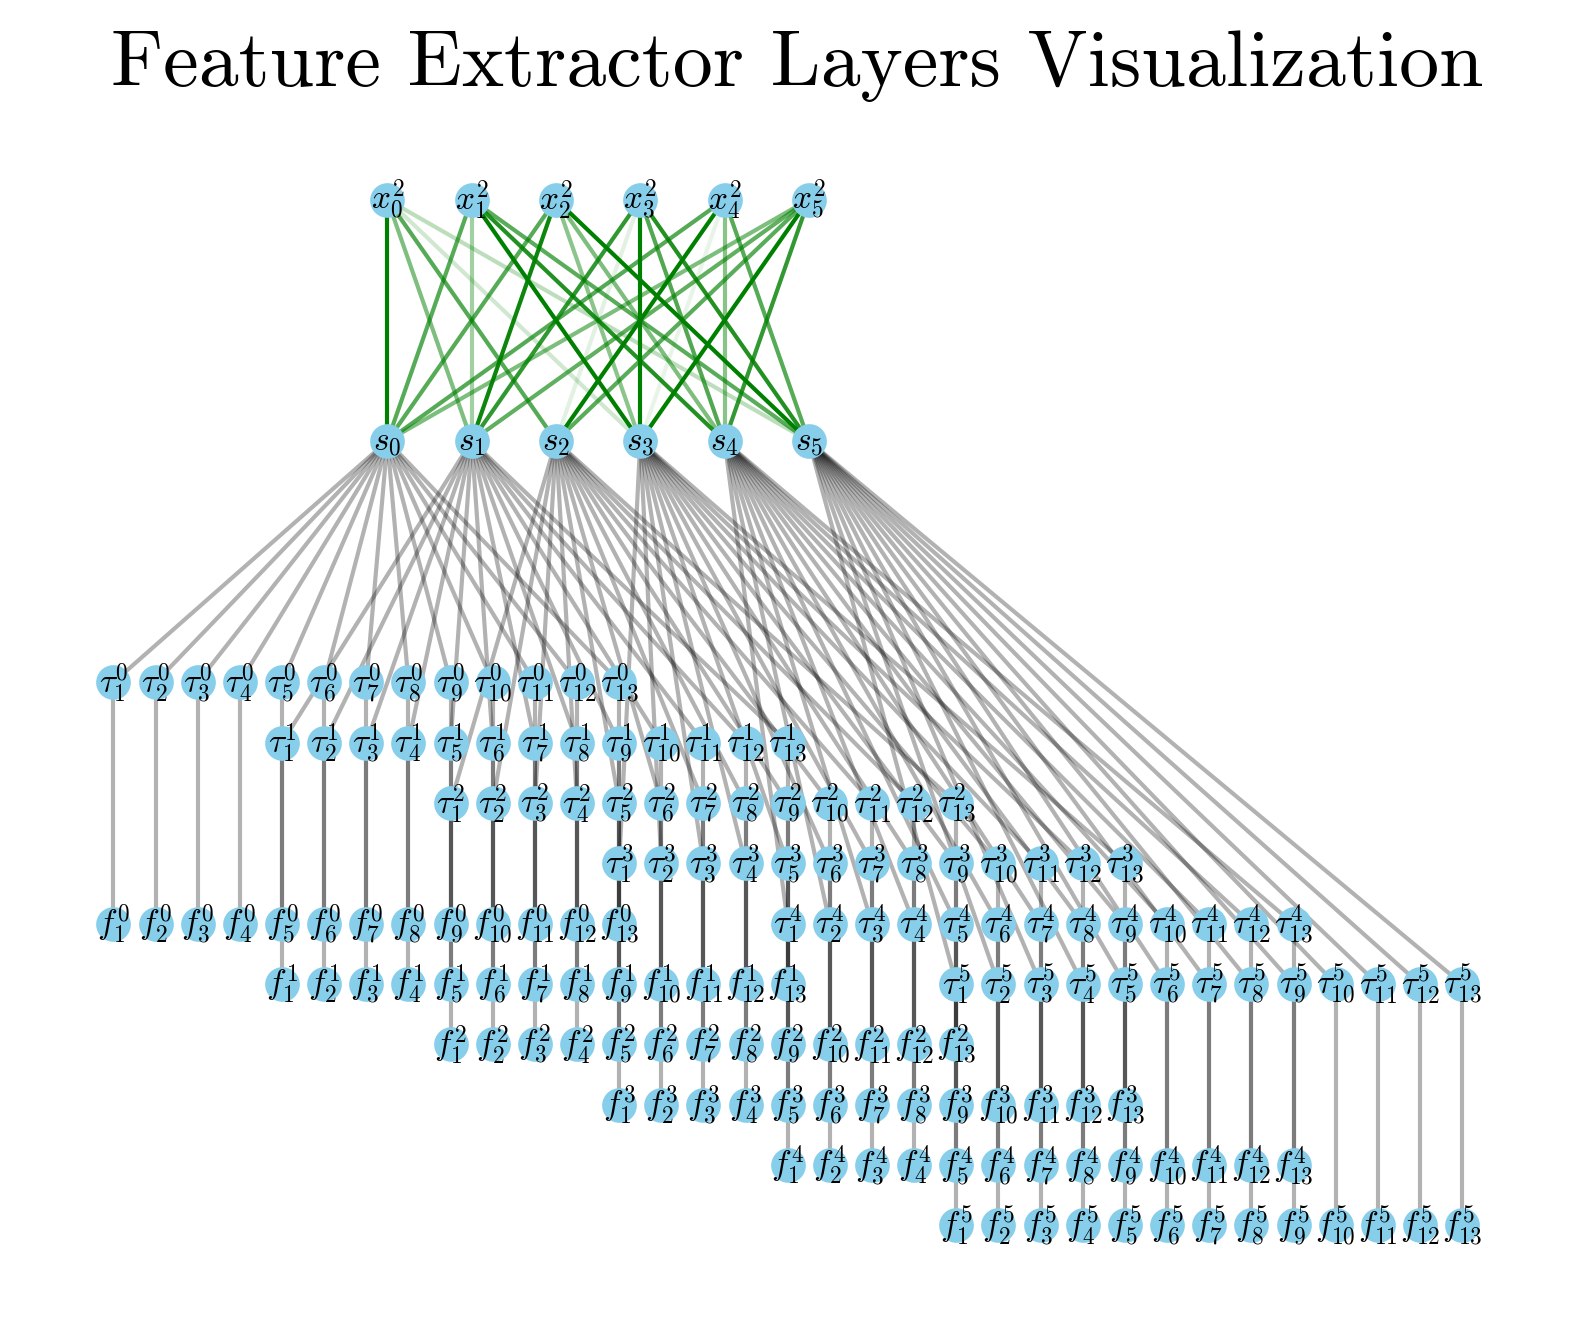

In [58]:
G_F,feature_nodes = draw_feature_layers(net.feature_extractor_layers, input_nodes)
draw_feature_G(G_F)

## 裁剪后重排

## 3.classifier

# 动态绘制节点

In [11]:
import networkx as nx
import plotly.graph_objs as go
from plotly.offline import plot

# 创建一个网络图
G = nx.karate_club_graph()

# 获取节点位置
pos = nx.spring_layout(G)

# 获取节点的x和y位置
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=[],
        line_width=2))

# 添加节点颜色和标签
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0,l=0,r=0,t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

plot(fig, filename='networkx.html')


'networkx.html'